In [ ]:
import dlsfunctions as dls
import numpy as np
import matplotlib.pyplot as plt
import emcee
import seaborn as sns
import pandas as pd

In [ ]:
r = 2.24e-9 
diameter = r*2
sigma = 2e-10
c = 1

m = 20
# c is already defined
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1



d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, diameter, sigma, c)
time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

In [ ]:
theta_input = np.append(f_1, beta)

In [4]:
sim_data = dls.g2(theta_input, d, m, gamma, time_in)

In [24]:
ndim = 21
nwalkers = 100
nsteps = 3000

In [25]:
start_pos = [theta_input + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [26]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d, sim_data, m, gamma, time_in))

In [27]:
result = sampler.run_mcmc(start_pos, nsteps)
sampler.acceptance_fraction

/home/tle3/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/tle3/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


array([0.327     , 0.339     , 0.34333333, 0.348     , 0.32533333,
       0.33533333, 0.32933333, 0.35      , 0.33366667, 0.34766667,
       0.35266667, 0.346     , 0.36066667, 0.33633333, 0.355     ,
       0.35133333, 0.33333333, 0.34766667, 0.352     , 0.337     ,
       0.33466667, 0.343     , 0.36533333, 0.32633333, 0.35066667,
       0.34      , 0.35333333, 0.329     , 0.35133333, 0.344     ,
       0.328     , 0.346     , 0.34566667, 0.346     , 0.34      ,
       0.37066667, 0.35533333, 0.34633333, 0.34133333, 0.33533333,
       0.36166667, 0.34133333, 0.34233333, 0.345     , 0.339     ,
       0.34666667, 0.34433333, 0.34466667, 0.34766667, 0.33533333,
       0.355     , 0.341     , 0.33833333, 0.349     , 0.34866667,
       0.357     , 0.339     , 0.33833333, 0.342     , 0.351     ,
       0.34333333, 0.353     , 0.32766667, 0.335     , 0.34666667,
       0.35833333, 0.33866667, 0.343     , 0.357     , 0.33666667,
       0.33766667, 0.355     , 0.33933333, 0.35466667, 0.332  

/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` func

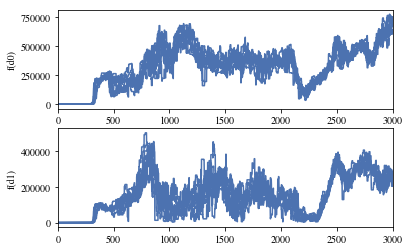

In [28]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)

In [29]:
samples = sampler.chain[:,2000:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [30]:
q

,f(d0),f(d1),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9),f(d10),f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),f(d17),f(d18),f(d19)
0.16,198162.300069,47014.654458,33737.982808,113645.900541,151398.176100,4.788894e+05,24685.710305,20396.285296,2.590446e+08,1.882839e+09,9.261468e+07,188834.620270,52947.899920,9.395203e+05,79386.287088,208196.130202,20832.381092,62064.178659,633016.567287,8.200860e+05
0.50,409480.384986,220616.810799,83689.910970,282492.468419,201298.022185,9.901142e+05,68320.094438,56094.809859,2.591508e+08,1.882920e+09,9.296678e+07,284510.669008,110033.632967,1.210913e+06,158083.212329,328083.653450,43938.249231,194088.440347,819696.508201,9.690186e+05
0.84,534240.098075,309877.249756,204133.620215,501402.846674,250313.669494,1.132982e+06,134686.965812,90644.489160,2.592129e+08,1.883292e+09,9.330628e+07,628322.350692,210607.967457,1.413644e+06,331239.859289,416083.583062,131597.786091,456506.111290,930549.276044,1.094830e+06


In [31]:
q_50 = q.quantile([0.5], axis=0)
q_50_array = q_50.values

In [32]:
q_50_array = q_50_array.flatten()

In [33]:
q_50_array.shape

(20,)

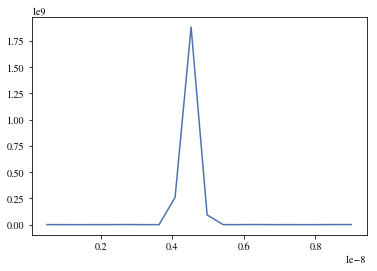

In [34]:
plt.plot(d, q_50_array)

In [23]:
dls.check_distribution_norm(q_50_array, d[1] - d[0])

2.2173653320261653

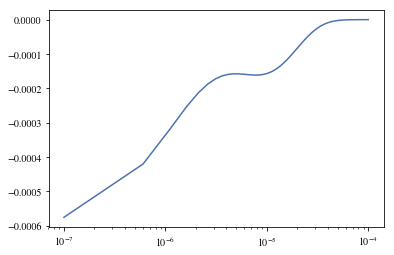

In [35]:
infer_g2 = dls.g2(np.append(q_50_array, 1), d, m, gamma, time_in)
plt.semilogx(time_in, sim_data - infer_g2)